In [164]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [165]:
ALPHA = 1.96 # contains 95% of data in normal distribution

class Arm:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        self.n = 0
        self.sum = 0
        self.sq_sum = 0
    
    def get_val(self):
        '''
        Return random value from arm with normal distribution.
        '''
        val = np.random.normal(self.mu, self.sigma)
        self.n += 1
        self.sum += val
        self.sq_sum += val * val
        return val
    
    def get_mean(self):
        '''
        Calculate and return mean.
        '''
        return self.sum / self.n if self.n != 0 else 0
    
    def get_stdev(self):
        ''' 
        Uses Welford's algorithm to calculate and return running standard deviation.
        '''
        mean = self.get_mean()
        return math.sqrt((self.sq_sum / self.n) - (mean * mean)) if self.n != 0 else 0
    
    def get_weight(self):
        mean = self.get_mean()
        stdev = self.get_stdev()
        return mean + ALPHA * ((stdev + mean) / math.sqrt(self.n + 1))

In [166]:
ARM_COUNT = 100
ARMS = []

def generate_arm():
    mu = random.uniform(10, 50)
    sigma = random.uniform(1, 10)
    ARMS.append(Arm(mu, sigma))
    
for _ in range(ARM_COUNT):
    generate_arm()

In [167]:
len(ARMS)

100

In [168]:
class MDP:
    def random_reward(self):
        arm = np.random.choice(self.arms, size=None, replace=False, p=None)
        return arm.get_val()
        
    def probabilistic_reward(self):
        weights = [arm.get_weight() for arm in self.arms]
        sum_weights = sum(weights)
        probabilities = [weight / sum_weights for weight in weights]
        arm = np.random.choice(self.arms, size=None, replace=False, p=probabilities)
        return arm.get_val()
        
    def __init__(self, e, arms, randomized = 0):
        self.epsilon = e
        self.reward = 0.0
        self.get_reward = [self.probabilistic_reward, self.random_reward][randomized]
        self.arms = arms
        
    def max_reward(self):
        arm = max(self.arms, key=lambda x : x.get_mean())
        return arm.get_val()
    
    def make_decision(self):
        decision_variable = random.random()
        if decision_variable <= self.epsilon:
            reward = self.get_reward()
            self.reward += reward
        else:
            self.reward += self.max_reward()

In [169]:
m_rand = MDP(0.5, ARMS, 1)
m_prob = MDP(0.5, ARMS)

ITER_NUM = 10000
BATCH_COUNT = 10

y_rand, y_prob = [0.0], [0.0]

for batch in range(BATCH_COUNT):
    print("Batch {}.......................".format(batch + 1))
    for _ in range(ITER_NUM):
        m_rand.make_decision()
        y_rand.append(m_rand.reward)
        
        m_prob.make_decision()
        y_prob.append(m_prob.reward)
    m_rand.epsilon -= 0.05
    m_prob.epsilon -= 0.05

Batch 1.......................
Batch 2.......................
Batch 3.......................
Batch 4.......................
Batch 5.......................
Batch 6.......................
Batch 7.......................
Batch 8.......................
Batch 9.......................
Batch 10.......................


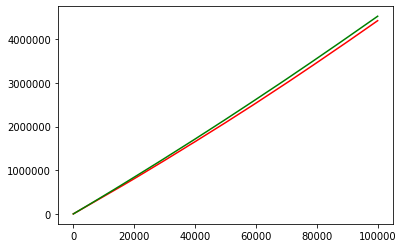

In [170]:
plt.plot(y_rand, color='r')
plt.plot(y_prob, color='g')

plt.show()